In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\spam.csv",encoding='latin1')
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Rename the columns for clarity
df = df.rename(columns={'v1': 'label', 'v2': 'message'})


In [5]:
# Drop unnecessary columns
df = df[['label', 'message']]

In [6]:
# Encode the 'label' column: 'ham' -> 0, 'spam' -> 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [7]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [8]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
X = df['message']
y = df['label']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)


In [11]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt



In [13]:
# Train Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test_tfidf)

In [14]:

# Evaluate the model
from sklearn.metrics import confusion_matrix


accuracy_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr}')
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.97      0.74      0.84       150

    accuracy                           0.96      1115
   macro avg       0.97      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



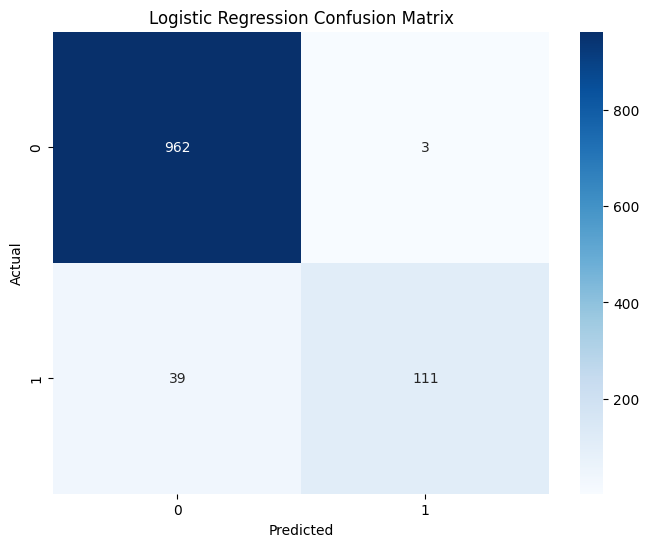

In [15]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Naive Bayes


In [17]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)


MultinomialNB()

In [18]:
# Make predictions
y_pred_nb = nb.predict(X_test_tfidf)

In [19]:
# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb}')
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9775784753363229
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



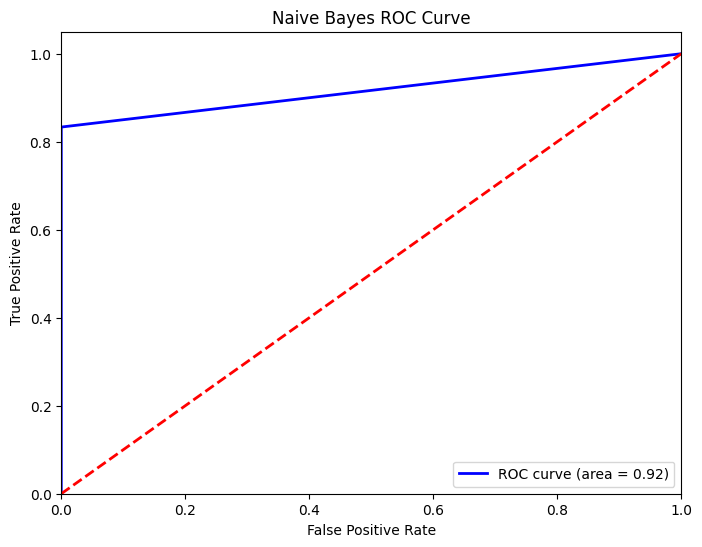

In [21]:
 #ROC Curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc="lower right")
plt.show()

 SVM

In [ ]:
from sklearn.svm import LinearSVC

# Train SVM model
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [ ]:
# Make predictions
y_pred_svm = svm.predict(X_test_tfidf)
y_prob_svm = svm.decision_function(X_test_tfidf)

In [ ]:
# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9766816143497757
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.87      0.91       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



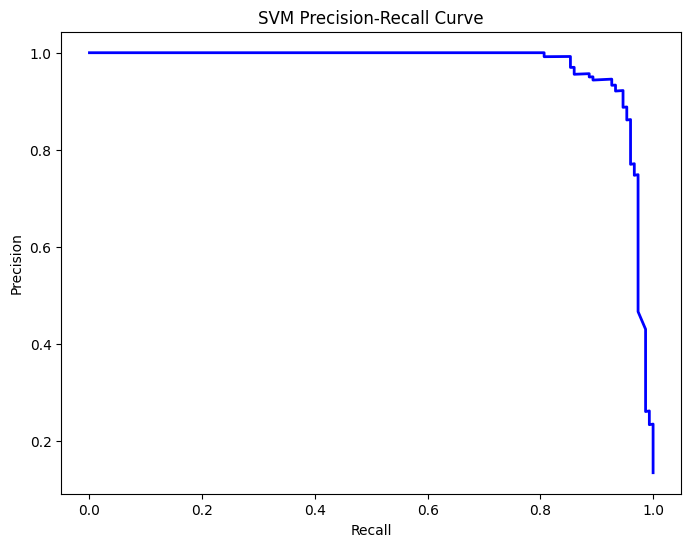

In [ ]:
from sklearn.metrics import precision_recall_curve
precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_prob_svm)
plt.figure(figsize=(8, 6))
plt.plot(recall_svm, precision_svm, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('SVM Precision-Recall Curve')
plt.show()

 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)


RandomForestClassifier()

In [ ]:
# Make predictions
y_pred_rf = rf.predict(X_test_tfidf)
y_prob_rf = rf.predict_proba(X_test_tfidf)[:, 1]


In [ ]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.979372197309417
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



C:\Users\DELL\AppData\Local\Temp\ipykernel_10396\3313569262.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_rf[sorted_idx_rf], y=top_features_rf, palette='Oranges_r')


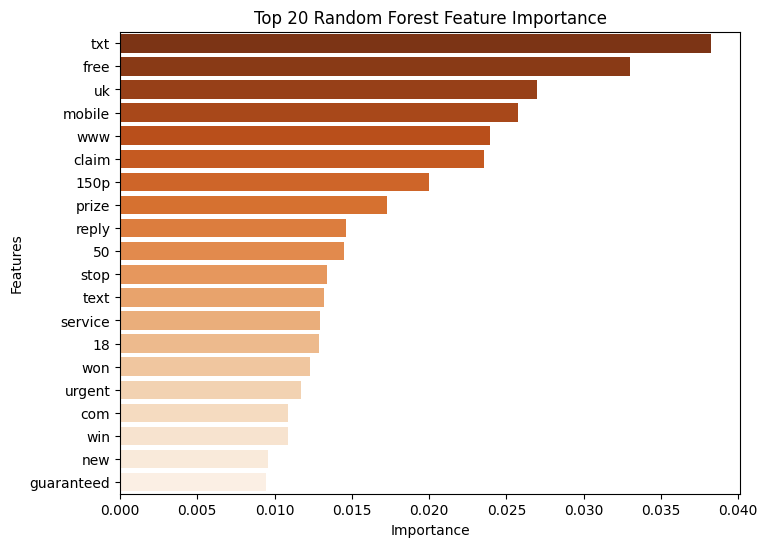

In [ ]:
# Feature Importance Bar Plot
feature_importance_rf = rf.feature_importances_
sorted_idx_rf = feature_importance_rf.argsort()[::-1][:20]
top_features_rf = vectorizer.get_feature_names_out()[sorted_idx_rf]
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance_rf[sorted_idx_rf], y=top_features_rf, palette='Oranges_r')
plt.title('Top 20 Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
# GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train_tfidf, y_train)


GradientBoostingClassifier()

In [ ]:
# Make predictions
y_pred_gb = gb.predict(X_test_tfidf)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
cm_gb = confusion_matrix(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb}')
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9587443946188341
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.70      0.82       150

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



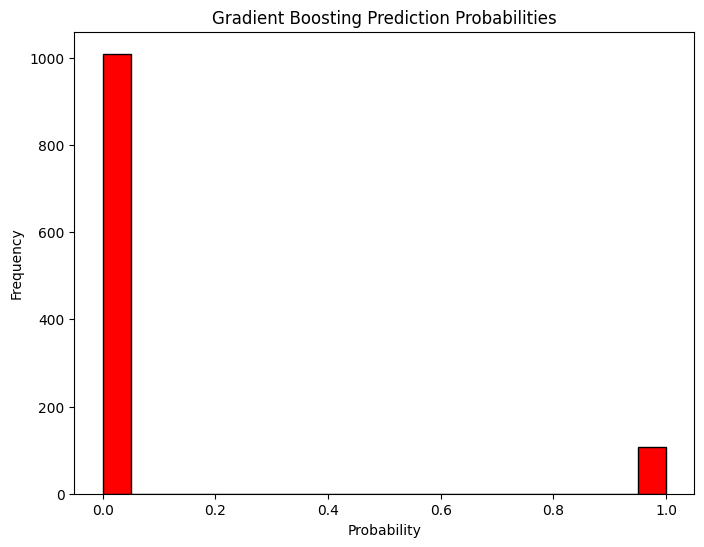

In [ ]:
# Histogram of Prediction Probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_pred_gb, bins=20, color='red', edgecolor='black')
plt.title('Gradient Boosting Prediction Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()